In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 综艺《打卡吧！吃货团》游戏———蔬菜消消乐
作者：Chen

日期：2022年9月24日

该游戏在光亚云上农场中进行，光亚云上农场拥有30余种植物。吃货团成员进入农场，每人选择至少五种蔬菜，若出现相同种类蔬菜则消去，最终留下的蔬菜种数既最终能获取红包的个数。由于蔬菜种类与参与人数数量较大，难以通过概率计算获得精确结果，故采用Monte Carlo方法，对离散系统进行计算仿真试验，计算在随机背景下该游戏的最终期望获得红包数量。

## 1. 计算期望值
假设每位参与者选取的蔬菜数量与种类随机。

In [2]:
def uniqueNum(N, n):
    """
    计算非重复蔬菜的个数.
    Args:
        N (int): 蔬菜种类数. 
        n (int): 人数.

    Returns:
        num_unique_vegetable (int): 非重复蔬菜的个数.
    
    """
    # 生成每个人选择的蔬菜
    vegetable_list = list(range(N))  # 蔬菜编号
    selected_vegetable = [random.sample(vegetable_list, random.randint(5, N)) for _ in range(n)]  # 每个人选择的蔬菜，至少选择5种
    selected_vegetable_1d = [element for sublist in selected_vegetable for element in sublist]  # 为方便计算，转化为一维数组

    # 选到相同蔬菜就消除（本质是留下出现有且仅有1次的蔬菜）
    unique_vegetable = []
    for element in selected_vegetable_1d:
        if selected_vegetable_1d.count(element) == 1:
            unique_vegetable.append(element)
    num_unique_vegetable = len(unique_vegetable)  # 计算非重复项的个数

    return num_unique_vegetable

In [3]:
def testValues(N, n, times=1000):
    """ 
    计算期望值.
    Args:
        times (int): 实验次数.
        N (int): 蔬菜种类数.
        n (int): 人数.

    Returns:
        mean (float): 期望值.
        std (float): 标准差.
    """
    results = [uniqueNum(N, n) for _ in range(times)] # 进行times次实验
    mean = np.mean(results) # 期望值 
    variance = np.var(results) # 方差
    std = np.sqrt(variance)  # 标准差
    
    return mean, std

假设共有10种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.014.
假设共有15种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.091.
假设共有20种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.264.
假设共有25种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.484.
假设共有30种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.696.
假设共有35种蔬菜，共7人参与游戏，平均非重复蔬菜种数为0.845.
假设共有40种蔬菜，共7人参与游戏，平均非重复蔬菜种数为1.102.
假设共有45种蔬菜，共7人参与游戏，平均非重复蔬菜种数为1.288.


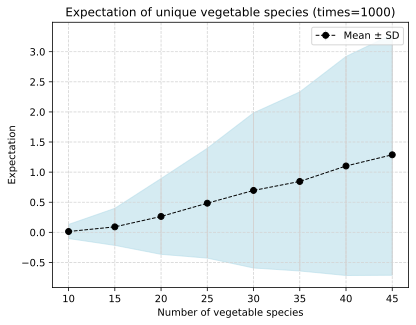

In [4]:
# 测试
n = 7 # 游戏人数
N_list = np.arange(10, 50, 5) # 蔬菜种数, 节目播出时介绍植物有30+种
times = 1000 # 每轮测试次数

mean = np.zeros(len(N_list)) # 初始化期望值
std = np.zeros(len(N_list)) # 初始化标准差
for i, N in enumerate(N_list):
    mean[i], std[i] = testValues(N, n, times) # 计算期望值和标准差
    print(f"假设共有{N}种蔬菜，共{n}人参与游戏，平均非重复蔬菜种数为{mean[i]}.")
    
# 绘图

plt.errorbar(N_list, mean, yerr=std, fmt='o--', color='black', ecolor='lightgray', linewidth=1, elinewidth=1, capsize=0, label='Mean ± SD')
plt.fill_between(N_list, mean+std, mean-std, color='lightblue', alpha=0.5)
plt.xlabel(r'Number of vegetable species')
plt.ylabel(r'Expectation')
plt.title(r'Expectation of unique vegetable species (times={})'.format(times))
plt.grid(True, linestyle='--', color='lightgrey')
plt.legend()
plt.show()

## 2. 寻找最优解
根据数学直觉，当每个人选择的数量一致时，获得红包数量的期望值最大。

In [5]:
# 用较小的参数验证数学直觉
# 假设
N = 10  # 蔬菜种类数
n = 3  # 人数
times = 100
vegetable_list = list(range(N))  # 蔬菜编号

def testIntuition(N):
    """
    遍历所有可能情况，找到最大非重复蔬菜数.
    Args:
        N (int): 蔬菜种类数.

    Returns:
        num_unique_vegetable_max (int): 最大非重复蔬菜数.
        num_select (list): 每个人选择的蔬菜数.
    """
    num_unique_vegetable_max = 0 # 最大非重复蔬菜数

    for x1 in range(5, N+1):
        for x2 in range(5, N+1):
            for x3 in range(5, N+1):
                vegetable1 = random.sample(vegetable_list, x1)
                vegetable2 = random.sample(vegetable_list, x2)
                vegetable3 = random.sample(vegetable_list, x3)
                selected_vegetable = [vegetable1, vegetable2, vegetable3] # 每个人选择的蔬菜
                selected_vegetable_1d = [element for sublist in selected_vegetable for element in sublist]  # 为方便计算，转化为一维数组

               # 选到相同蔬菜就消除（本质是留下出现有且仅有1次的蔬菜）
                unique_vegetable = []
                for element in selected_vegetable_1d:
                   if selected_vegetable_1d.count(element) == 1:
                       unique_vegetable.append(element)
                num_unique_vegetable = len(unique_vegetable)  # 计算非重复项的个数
            
                if num_unique_vegetable > num_unique_vegetable_max:
                    num_unique_vegetable_max = num_unique_vegetable
                    num_select = [x1, x2, x3]

    return num_unique_vegetable_max, num_select

avg_num_select_max = [np.mean([testIntuition(N)[1][i] for _ in range(times)]) for i in range(n)] # 期望值
condition = np.var([avg_num_select_max]) < 0.1
print(f"The assumption is {condition}. ")

The assumption is True. 


由此，寻找最优解基于“每个人选择的数量一致”假设。

In [6]:
def optimalSelection(N, n, times=1000):
    """
    对于不同的蔬菜种类数N，进行模拟以找到平均非重复蔬菜个数的最大值。
    Args:
        N (int): 蔬菜种类数的最大值。
        n (int): 人数。
        times (int): 每个N值要模拟的次数。
        
    Returns:
        N_optimal (int): 最优的蔬菜种类数。
        max_unique_average (float): 对应最优蔬菜种类数的最大平均非重复蔬菜个数。
    """
    max_unique_average = 0
    N_optimal = 0
    vegetable_list = list(range(N))  # 蔬菜编号

    for N_select in range(1, N+1):
        num_unique_vegetable = []  # 初始化非重复蔬菜个数
        for _ in range(times):
            selected_vegetable = [random.sample(vegetable_list, N_select) for _ in range(n)]  # 每个人选择N_select种蔬菜， 此时不做选取最小数量限制
            selected_vegetable_1d = [element for sublist in selected_vegetable for element in sublist]  # 为方便计算，转化为一维数组

            # 选到相同蔬菜就消除（本质是留下出现有且仅有1次的蔬菜）
            unique_vegetable = []
            for element in selected_vegetable_1d:
                if selected_vegetable_1d.count(element) == 1:
                    unique_vegetable.append(element)
            num_unique_vegetable.append(len(unique_vegetable))  
        unique_avg = np.mean(num_unique_vegetable)  
        plt.plot(N_select, unique_avg, 'black', marker='o')

        if unique_avg > max_unique_average:
            max_unique_average = unique_avg
            N_optimal = N_select
    
    plt.xlabel(r'Number of selected vegetable species of each person')
    plt.ylabel(r'Average number of unique vegetable species')
    plt.grid(True, linestyle='--', color='lightgrey')
    plt.show()

    return N_optimal, max_unique_average



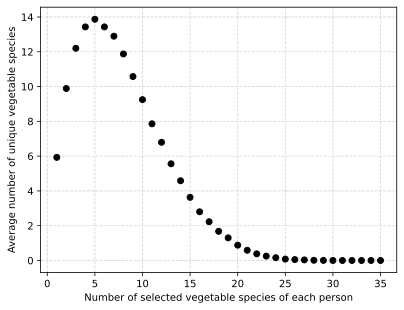

假设共有35种蔬菜，共7人参与游戏，最优的每个人选择蔬菜种类数为5，期望值13.87.


In [7]:
# 设定参数
N = 35  # 蔬菜种类数
n = 7  # 人数
times = 1000  

# 模拟
N_optimal, expectation = optimalSelection(N, n, times)
print(f"假设共有{N}种蔬菜，共{n}人参与游戏，最优的每个人选择蔬菜种类数为{N_optimal}，期望值{expectation}.")